In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Loan_Data.csv")

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df.shape

(614, 13)

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
duplicate_count = df.duplicated().sum()
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [24]:
print(f"\nOriginal 'Dependents' values: {df['Dependents'].unique()}")


Original 'Dependents' values: ['0' '1' '2' '3+' nan]


In [26]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
print(f"Cleaned 'Dependents' values: {df['Dependents'].unique()}")

Cleaned 'Dependents' values: ['0' '1' '2' '3' nan]


In [28]:
print("\n--- Univariate Analysis: Categorical ---")
plt.figure(figsize=(12, 5))


--- Univariate Analysis: Categorical ---


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

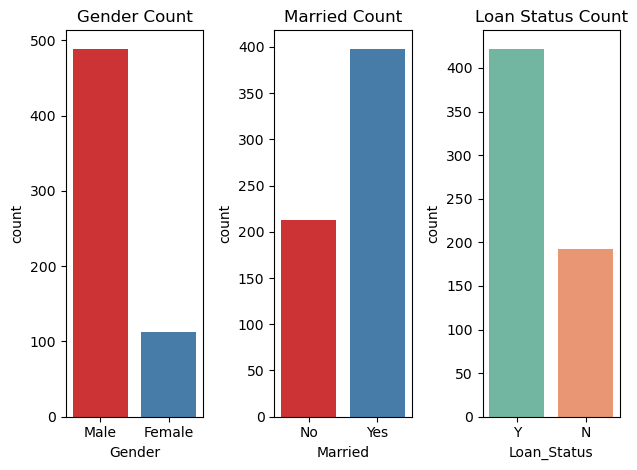

In [30]:
# Plot 1: Gender
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df, palette='Set1')
plt.title('Gender Count')

# Plot 2: Married
plt.subplot(1, 3, 2)
sns.countplot(x='Married', data=df, palette='Set1')
plt.title('Married Count')

# Plot 3: Loan Status (Our Target)
plt.subplot(1, 3, 3)
sns.countplot(x='Loan_Status', data=df, palette='Set2')
plt.title('Loan Status Count')

plt.tight_layout()
plt.savefig('categorical_counts.png')
plt.show()


--- Univariate Analysis: Numerical ---


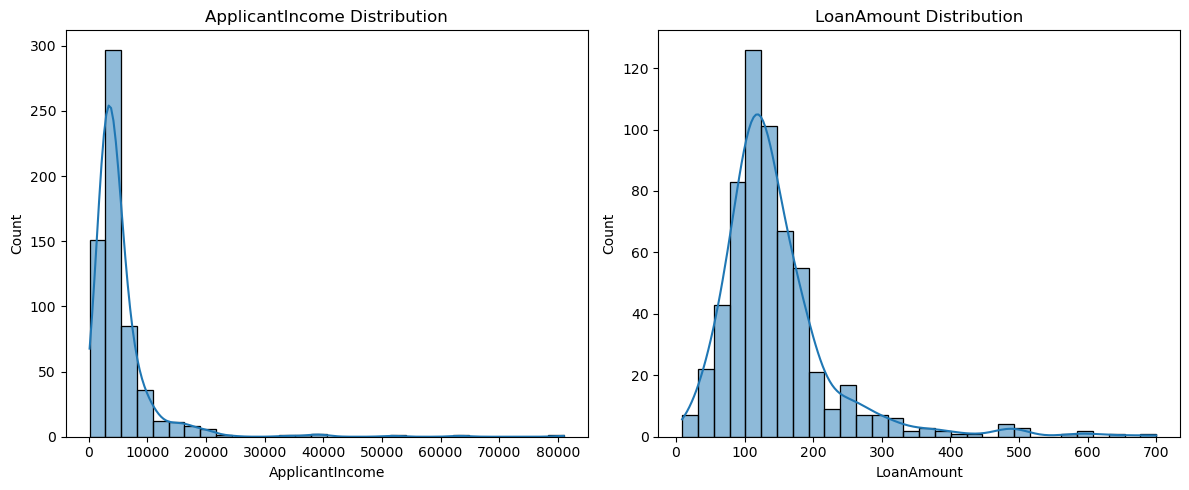

In [32]:
# We'll plot histograms to see the distribution of numerical data.
print("\n--- Univariate Analysis: Numerical ---")
plt.figure(figsize=(12, 5))

# Plot 1: ApplicantIncome
plt.subplot(1, 2, 1)
sns.histplot(df['ApplicantIncome'], kde=True, bins=30)
plt.title('ApplicantIncome Distribution')

# Plot 2: LoanAmount
plt.subplot(1, 2, 2)
sns.histplot(df['LoanAmount'], kde=True, bins=30)
plt.title('LoanAmount Distribution')

plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()

Text(0.5, 1.0, 'Credit History vs. Loan Status')

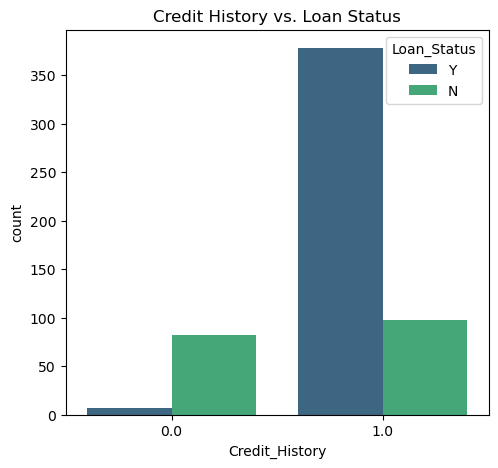

In [36]:
df['Loan_Status_Num'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Plot 1: Credit History vs. Loan Status
# This is the most important relationship
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='viridis')
plt.title('Credit History vs. Loan Status')

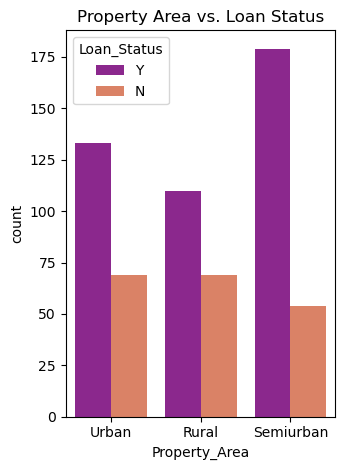

In [38]:
# Plot 2: Property Area vs. Loan Status
plt.subplot(1, 2, 2)
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette='plasma')
plt.title('Property Area vs. Loan Status')

plt.tight_layout()
plt.savefig('multivariate_counts.png')
plt.show()

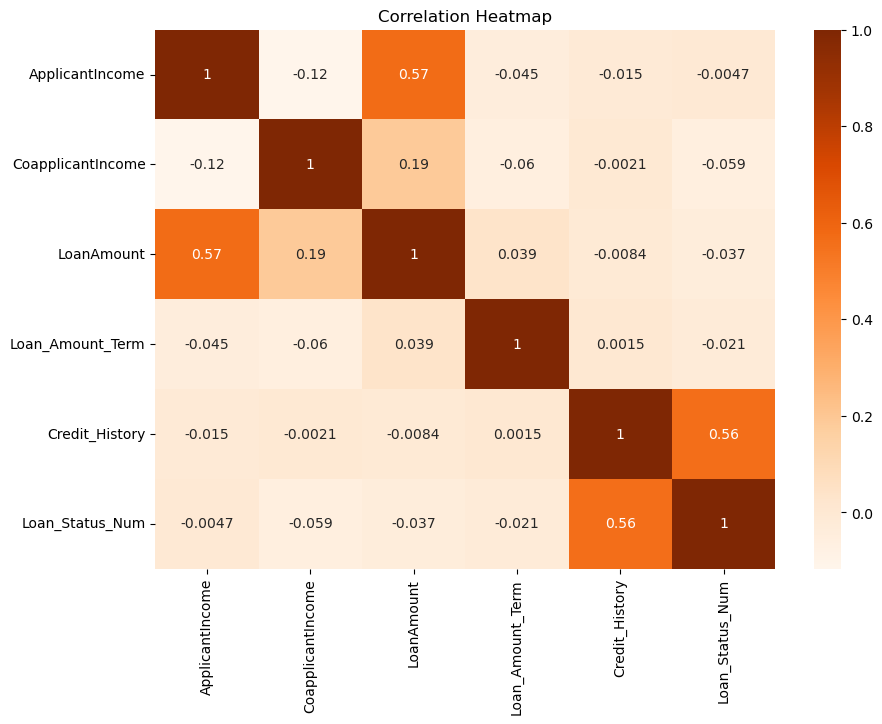

In [40]:
# Plot 3: Correlation Heatmap for numerical features
# We need to select only numerical columns for correlation
numerical_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='Oranges')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

In [42]:
# 1. Combine Applicant and Coapplicant income
# (We fill NaNs with 0 in case CoapplicantIncome is missing, though it wasn't)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome'].fillna(0)
print("Created 'TotalIncome' column.")

Created 'TotalIncome' column.


In [44]:
# 2. Log Transform skewed data
# As we saw in Step 3, ApplicantIncome, LoanAmount, and TotalIncome are skewed.
# Log transform helps make their distribution more normal.
# We fill NaNs in LoanAmount before transforming.
df['LoanAmount_log'] = np.log(df['LoanAmount'].fillna(df['LoanAmount'].mean()))
df['TotalIncome_log'] = np.log(df['TotalIncome'])

print("Created 'LoanAmount_log' and 'TotalIncome_log' columns.")

Created 'LoanAmount_log' and 'TotalIncome_log' columns.


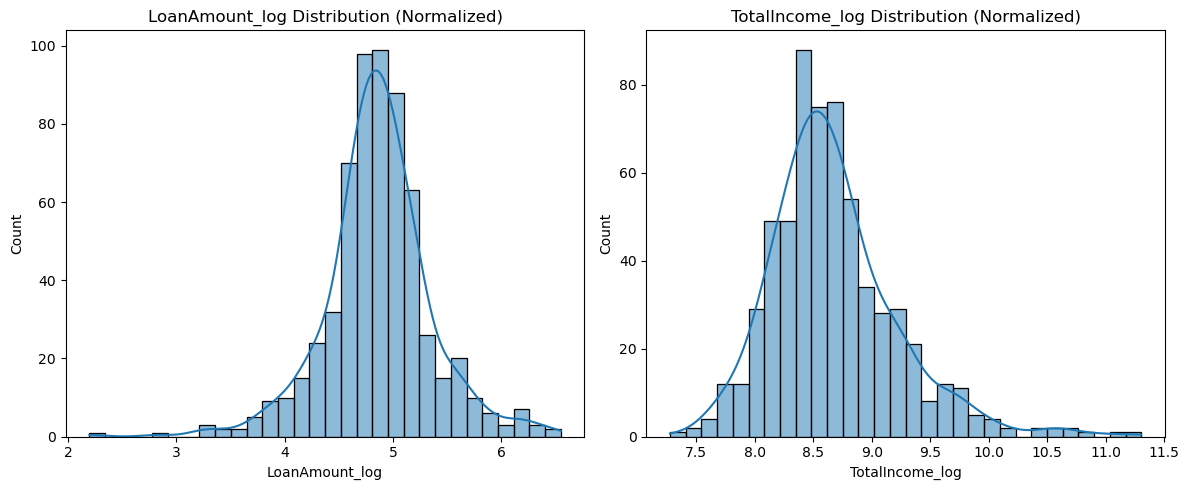

In [46]:
# Plot the new log-transformed distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['LoanAmount_log'], kde=True, bins=30)
plt.title('LoanAmount_log Distribution (Normalized)')

plt.subplot(1, 2, 2)
sns.histplot(df['TotalIncome_log'], kde=True, bins=30)
plt.title('TotalIncome_log Distribution (Normalized)')

plt.tight_layout()
plt.savefig('log_transform_dists.png')
plt.show()


--- Outlier Detection ---


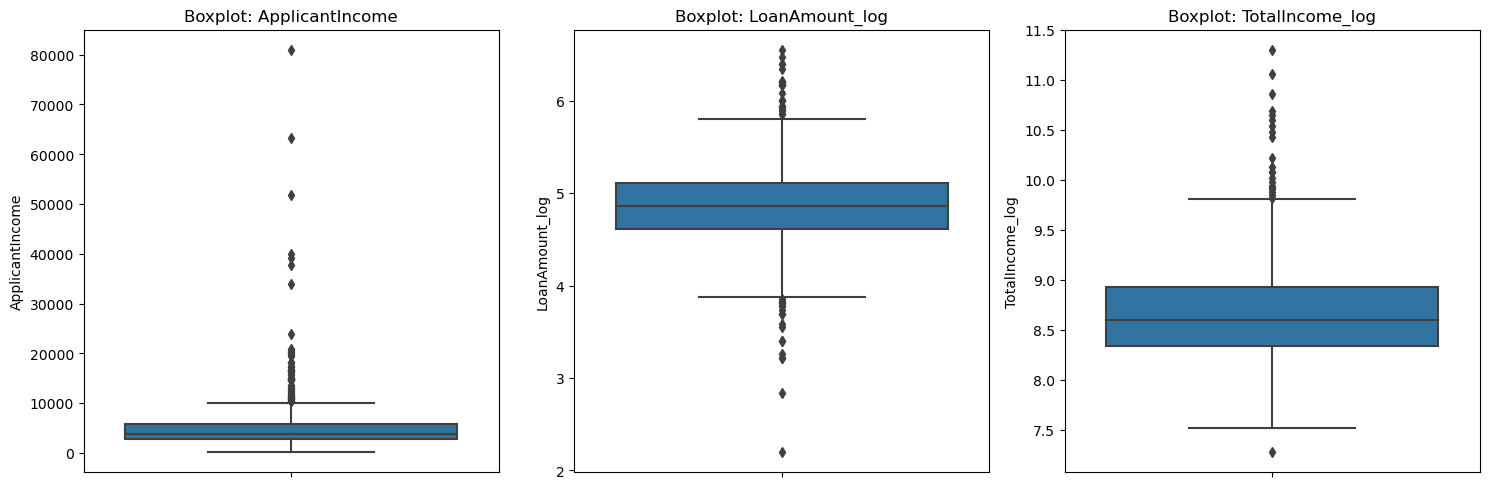

In [48]:
print("\n--- Outlier Detection ---")
plt.figure(figsize=(15, 5))

# We'll use the log-transformed features as they are more stable
plt.subplot(1, 3, 1)
sns.boxplot(y=df['ApplicantIncome'])
plt.title('Boxplot: ApplicantIncome')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['LoanAmount_log'])
plt.title('Boxplot: LoanAmount_log')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['TotalIncome_log'])
plt.title('Boxplot: TotalIncome_log')

plt.tight_layout()
plt.savefig('outlier_boxplots.png')
plt.show()

In [50]:
print(f"Missing values BEFORE:\n{df.isnull().sum()}")

# Categorical features: Fill with mode (most frequent value)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Numerical features: Fill with mean (average value)
# We already filled LoanAmount, but this is a good practice.
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

# Our log features were already filled during creation, but we double-check.
df['LoanAmount_log'] = df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean())

print(f"\nMissing values AFTER:\n{df.isnull().sum()}")

Missing values BEFORE:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Loan_Status_Num       0
TotalIncome           0
LoanAmount_log        0
TotalIncome_log       0
dtype: int64

Missing values AFTER:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loan_Status_Num      0
TotalIncome          0
LoanAmount_log       0
TotalIncome_log      0
dtype: int64


In [52]:
# 1. Encode the Target Variable (y)
# We'll change 'Y' to 1 and 'N' to 0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
print(f"Target 'Loan_Status' encoded: {df['Loan_Status'].unique()}")

# 2. Define Features (X) and Target (y)
# We select the features we want to use. We'll use the log-transformed
# and engineered features, and drop the originals.
features_to_use = [
    'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
    'Loan_Amount_Term', 'Credit_History', 'Property_Area',
    'LoanAmount_log', 'TotalIncome_log' # Our new features!
]

X = df[features_to_use]
y = df['Loan_Status']

# 3. Encode the Features (X)
# We use pd.get_dummies() to create new columns for each category (One-Hot Encoding)
# This is the correct way, instead of LabelEncoder which you used in the notebook.
X = pd.get_dummies(X, drop_first=True)

print("\nFeatures (X) after get_dummies:")
print(X.head())

Target 'Loan_Status' encoded: [1 0]

Features (X) after get_dummies:
   Loan_Amount_Term  Credit_History  LoanAmount_log  TotalIncome_log  \
0             360.0             1.0        4.986426         8.674026   
1             360.0             1.0        4.852030         8.714568   
2             360.0             1.0        4.189655         8.006368   
3             360.0             1.0        4.787492         8.505323   
4             360.0             1.0        4.948760         8.699515   

   Gender_Male  Married_Yes  Dependents_1  Dependents_2  Dependents_3  \
0         True        False         False         False         False   
1         True         True          True         False         False   
2         True         True         False         False         False   
3         True         True         False         False         False   
4         True        False         False         False         False   

   Education_Not Graduate  Self_Employed_Yes  Property_Area

In [54]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (491, 13)
X_test shape: (123, 13)
y_train shape: (491,)
y_test shape: (123,)


In [56]:
from sklearn.preprocessing import StandardScaler

# 1. Create the scaler
scaler = StandardScaler()

# 2. Fit and transform ON THE TRAINING DATA ONLY
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform THE TEST DATA (using the scaler from train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Scaling Complete ---")
print("X_train scaled (first row):")
print(X_train_scaled[0])


--- Scaling Complete ---
X_train scaled (first row):
[ 0.28761093  0.40776315  1.42057915  0.59274891  0.48339253  0.75744171
 -0.43788991 -0.43458254 -0.30184617 -0.53417255 -0.39751587  1.25326798
 -0.69203733]



--- Logistic Regression ---
Accuracy: 0.7886

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:


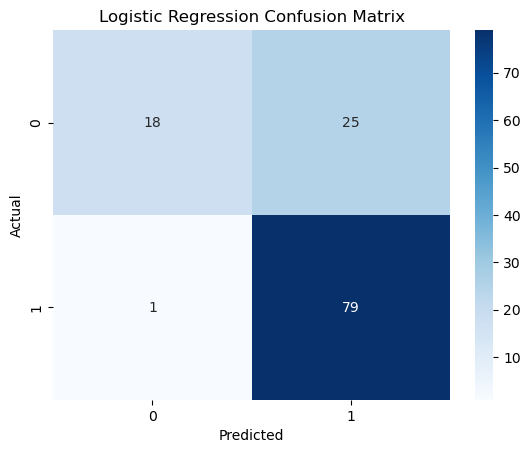


--- K-Nearest Neighbors ---
Accuracy: 0.7480

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.42      0.54        43
           1       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67      0.68       123
weighted avg       0.75      0.75      0.73       123

Confusion Matrix:


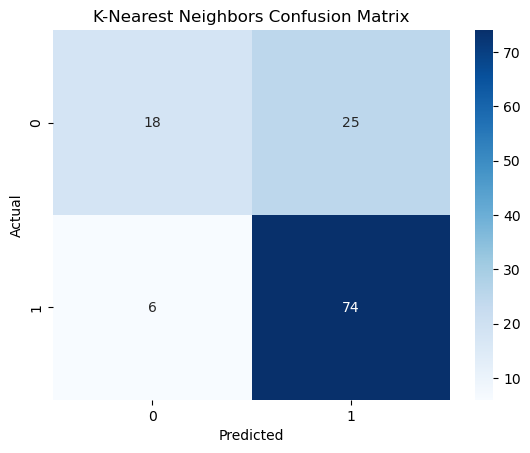


--- Decision Tree ---
Accuracy: 0.6829

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        43
           1       0.75      0.78      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.64      0.65       123
weighted avg       0.68      0.68      0.68       123

Confusion Matrix:


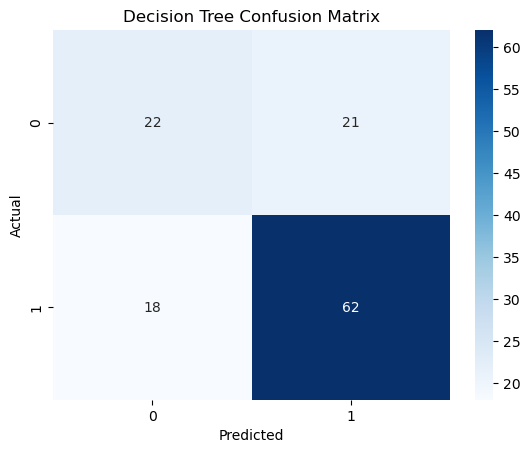


--- Gaussian Naive Bayes ---
Accuracy: 0.7805

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

Confusion Matrix:


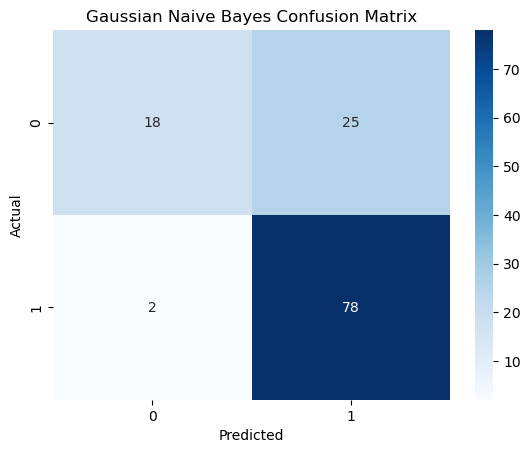


--- Random Forest ---
Accuracy: 0.7805

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.47      0.60        43
           1       0.77      0.95      0.85        80

    accuracy                           0.78       123
   macro avg       0.80      0.71      0.72       123
weighted avg       0.79      0.78      0.76       123

Confusion Matrix:


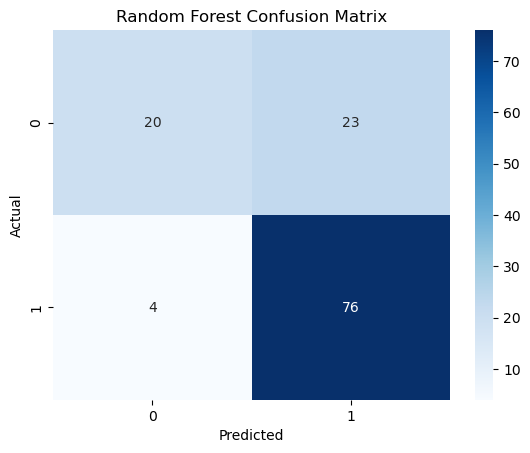

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Loop through and train/evaluate each model
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # --- Evaluate ---
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.savefig(f'{name}_cm.png')
    plt.show()

In [60]:
from sklearn.model_selection import cross_val_score

# We'll test our best model so far (likely Random Forest or Logistic Regression)
# We use the *full* X and y (unscaled) because cross_val_score
# is smart, but for simplicity, let's use our scaled training data.
model_to_cv = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
# It splits X_train_scaled into 5 parts, trains on 4, tests on 1 (and repeats 5 times)
scores = cross_val_score(model_to_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("\n--- Cross-Validation (Random Forest) ---")
print(f"Scores for each fold: {scores}")
print(f"Average Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")


--- Cross-Validation (Random Forest) ---
Scores for each fold: [0.86868687 0.7755102  0.7755102  0.79591837 0.82653061]
Average Accuracy: 0.8084
Standard Deviation: 0.0354


In [62]:
from sklearn.model_selection import GridSearchCV

# 1. Define the parameters to test (a small grid for speed)
param_grid = {
    'n_estimators': [100, 200],      # Number of trees
    'max_depth': [None, 10, 20],     # Max depth of each tree
    'min_samples_leaf': [1, 2, 5]    # Min samples in a leaf node
}

# 2. Set up the Grid Search
# It will try all combinations (2*3*3 = 18) using 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1 # Use all available CPU cores
)

print("\n--- Hyperparameter Tuning (GridSearchCV) ---")
print("Running Grid Search... (This might take a second)")
# 3. Run the search
grid_search.fit(X_train_scaled, y_train)

# 4. Show the best settings
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


--- Hyperparameter Tuning (GridSearchCV) ---
Running Grid Search... (This might take a second)
Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.8207



--- Final Model Evaluation ---
Final Tuned Model Accuracy on Test Set: 0.7886

Final Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Final Confusion Matrix:


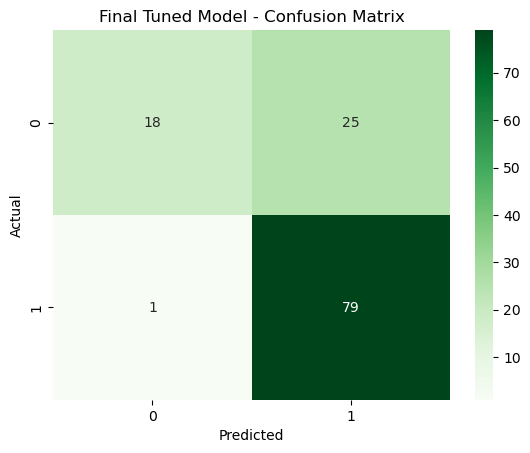

In [64]:
print("\n--- Final Model Evaluation ---")

# 1. Get the best model from the grid search
best_model = grid_search.best_estimator_

# 2. Make predictions on the unseen test set
y_pred_final = best_model.predict(X_test_scaled)

# 3. Evaluate its performance
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Tuned Model Accuracy on Test Set: {final_accuracy:.4f}")

print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))

print("Final Confusion Matrix:")
cm_final = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Final Tuned Model - Confusion Matrix')
plt.savefig('final_model_cm.png')
plt.show()